In [1]:

import numpy as np
import matplotlib.pyplot as plt

import json
from tqdm.notebook import tqdm

from scipy import stats

import glob

from combra import data, angles
import os

import glob
import multiprocessing

import numpy as np
from pathlib import Path
from mpire import WorkerPool
from skimage import io, color, filters, morphology, util
import cv2
import re
import pyarrow as pa
import pyarrow.parquet as pq
from tqdm import tqdm

from combra import data, angles, mvee

In [ ]:
!pwd

In [2]:
# images_folder_path='./data/o_bc_left_4x_1536_1024x1024_N360'

# image_hdf_path = './data/san_256x256_N100_000.h5'
image_hdf_path = './data/san_512x512_N100_000.h5'
images_folder_path=None

dataset = data.PobeditDataset(
                              images_folder_path=images_folder_path,
                              image_hdf_path = image_hdf_path,
                              max_images_num_per_class=100, hdf_images_threshold=11)

Directory tree:
└── san_512x512_N100_000.h5
    ├── attrs.format = stylegan_generated_images
    ├── attrs.image_shape_hwc = (512, 512, 3)
    ├── attrs.samples_per_class = 100000
    └── attrs.classes = [0, 1, 2]
    ├── class_0
    │   ├── images shape=(100000, 512, 512, 3)
    │   ├── seeds shape=(100000,)
    │   └── written shape=(100000,)
    ├── class_1
    │   ├── images shape=(100000, 512, 512, 3)
    │   ├── seeds shape=(100000,)
    │   └── written shape=(100000,)
    └── class_2
        ├── images shape=(100000, 512, 512, 3)
        ├── seeds shape=(100000,)
        └── written shape=(100000,)


In [ ]:


types_dict = {
    "Ultra_Co11": "средние зерна",
    "Ultra_Co25": "мелкие зерна",
    "Ultra_Co8": "средне-мелкие зерна",
    "Ultra_Co6_2": "крупные зерна",
    "Ultra_Co15": "средне-мелкие зерна",
}

out = dataset.generate_angles(
    save_path="san_512x512_N100_000",   
    types_dict=types_dict,
    step=[1,2,3,4,5],                     
    workers=20,
    angles_tol=3,               
)

print("Angles outputs:", out)


Processing angles (step=1.0, n=100): 100%|██████████| 300/300 [00:01<00:00, 165.26it/s]


Saved angles parquet: /home/david/mnt/ssd_2_sata/python/phd/wc_cv/co_angles/san_512x512_N100_000/angles_n100_step1.parquet


Processing angles (step=2.0, n=100): 100%|██████████| 300/300 [00:02<00:00, 140.41it/s]


Saved angles parquet: /home/david/mnt/ssd_2_sata/python/phd/wc_cv/co_angles/san_512x512_N100_000/angles_n100_step2.parquet


Processing angles (step=3.0, n=100): 100%|██████████| 300/300 [00:01<00:00, 156.09it/s]


Saved angles parquet: /home/david/mnt/ssd_2_sata/python/phd/wc_cv/co_angles/san_512x512_N100_000/angles_n100_step3.parquet


Processing angles (step=4.0, n=100): 100%|██████████| 300/300 [00:02<00:00, 136.48it/s]


Saved angles parquet: /home/david/mnt/ssd_2_sata/python/phd/wc_cv/co_angles/san_512x512_N100_000/angles_n100_step4.parquet


Processing angles (step=5.0, n=100): 100%|██████████| 300/300 [00:02<00:00, 138.41it/s]

Saved angles parquet: /home/david/mnt/ssd_2_sata/python/phd/wc_cv/co_angles/san_512x512_N100_000/angles_n100_step5.parquet
Angles outputs: [PosixPath('san_512x512_N100_000/angles_n100_step1.parquet'), PosixPath('san_512x512_N100_000/angles_n100_step2.parquet'), PosixPath('san_512x512_N100_000/angles_n100_step3.parquet'), PosixPath('san_512x512_N100_000/angles_n100_step4.parquet'), PosixPath('san_512x512_N100_000/angles_n100_step5.parquet')]


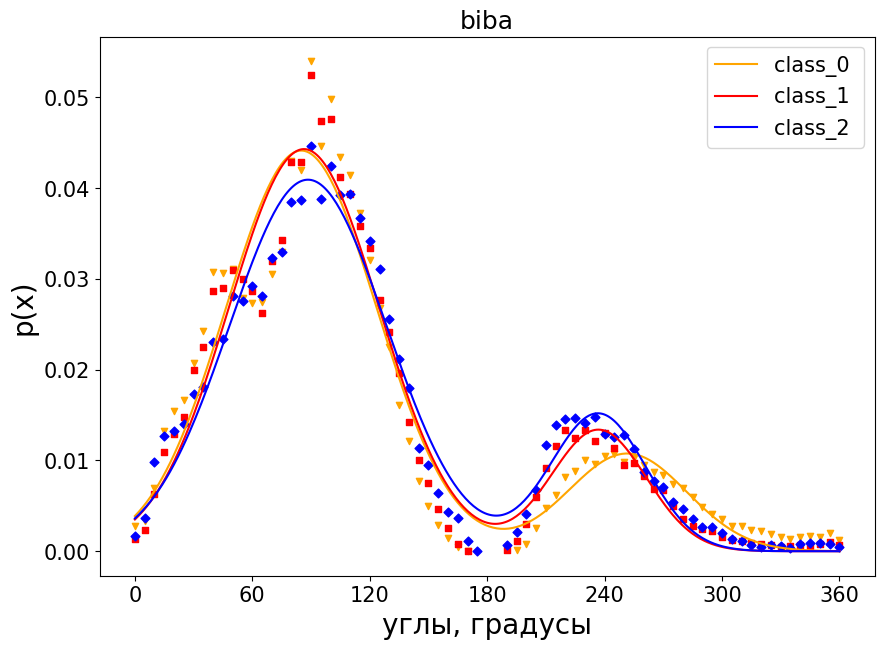

--------------
class_0 
 количество углов 110316
 количество снимков 100
 шаг угла 5.0 градусов
 mu1 = 85.05 sigma1 = 38.56 amp1 = 4.27
 mu2 = 251.61 sigma2 = 30.43 amp2 = 0.82
--------------
class_1 
 количество углов 45311
 количество снимков 100
 шаг угла 5.0 градусов
 mu1 = 86.41 sigma1 = 38.34 amp1 = 4.26
 mu2 = 236.91 sigma2 = 24.41 amp2 = 0.82
--------------
class_2 
 количество углов 26894
 количество снимков 100
 шаг угла 5.0 градусов
 mu1 = 88.44 sigma1 = 40.14 amp1 = 4.12
 mu2 = 236.76 sigma2 = 24.59 amp2 = 0.93
CPU times: user 945 ms, sys: 38.4 ms, total: 983 ms
Wall time: 978 ms


In [8]:
%%time
# ---- read parquet and plot ----
in_path = Path("./san_512x512_N100_000/angles_n100_step5.parquet")
table = pq.read_table(in_path)
rows = table.to_pydict()

angles.angles_plot_base(rows, save_name="biba", N=10, M=7, save=False, indices=None, font_size=20, scatter_size=20)

In [ ]:
%%time
# ---- read parquet and plot ----
in_path = Path("angles.parquet")
table = pq.read_table(in_path)
rows = table.to_pydict()

In [ ]:
angles.angles_plot_base(rows, save_name="biba", N=10, M=7, save=False, indices=None, font_size=20, scatter_size=20)

In [ ]:
mvee.plot_beam_base(rows,save_name='biba',step=5,N=7,M=7,  save=False,indices=None, font_size=20,scatter_size=20)